___
### <p style="text-align: right;"> &#9989; Elizabeth Walter</p>
___

<img src="https://cmse.msu.edu/sites/_cmse/assets/Image/image002.jpg"
     alt="CMSE Logo"
     align="right" 
     height="100" 
     width="100" />
     
     
# CMSE 201 
## Spring 2021
____

## Homework 5: Modeling COVID with ODEs and ABMs
____


### Goals

#### By the end of this HW, you will:
1. have practice with a very simple use of `solve_ivp` that reveals if you are using it correctly,
2. get more practice with the SIR model, with application to COVID,
3. see how to answer specific modeling questions using `solve_ivp` in two stages,
4. think about how to model COVID when social distancing lapses or there are new mutations,
5. learn a simple ABM code and how it works and comment it in detail,
6. modify the ABM to answer modeling questions.

___
### Assignment instructions

Work through this notebook and follow the directions. This HW is slightly more conceptual with larger portions of the code given to you. Be sure to look for the questions.

*This assignment is due at the usual time for your section. Ask your instructor if you are unclear on the due time.*

Upload to D2L as usual. 

___
### Grading

* Academic Integrity (1 pt)
* Part 1 (15 pts)
* Part 2 (15 pts)
* Part 3 (14 pts)

**Total:** 45 points

---
# Academic integrity statement (1 point)

In the markdown cell below, put your personal academic integrity statement (composed during the Day04 In-Class Assignment). By including this statement, you are confirming that the work you submit in the assignment is wholly your own.  

<font size=6 color="#009600">&#9998;</font> I, __Elizabeth Walter__, value honesty, fairness, integrity, and equity above little else. I expect these things from myself and my community, and cheating, along with other unethical behavior, is incompatible with such values. I commit to being fair and honest by completing all my assignments myself and citing sources when I receive help. I am aware of and will abide by the MSU ethical standards for integrity.


In [56]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
# let's upgrade from the usual, boring style
plt.style.use('fivethirtyeight')

____
____

## Part 1: Simple Review of `solve_ivp`
____


When you learn to use a new library in Python, it is a good idea to be sure that you are using it correctly. A common approach to this is to think of an example that is easy; for example, you already know the answer. Let's see what that strategy would look like if we were learning `solve_ivp` for the first time.

In our introductory calculus class we learned that exponentials are the derivatives of themselves. That is, consider
$$y(t) = y(0) e^{-t/T}.$$
This is an exponential decay over time $t$. Notice that it has two parameters: $y(0)$ and $T$. Note that if we put $t=0$ in this expression we see that $y(0)$ is the starting value, which is why we used that notation. This parameter is sometimes called the "initial condition" for obvious reasons. The other parameter $T$ tells us how quickly or slowly the exponential decays. If we take the derivative of this expression we get
$$\frac{dy(t)}{dt} = -\frac{1}{T}y(t),$$
which is an ordinary differential equation (ODE) - and we already know its solution! (In other words, we know the solution for $y$ at every $t$. You can check this by putting the exponential from above into the ODE and seeing that you get an equality.)

If we present this a diagram, this simple system/model could be represented as: <img src="https://raw.githubusercontent.com/msu-cmse-courses/cmse201-S21-student/master/assets/img/exp_decay.png" width=200>

Let's use `solve_ivp` to solve this ODE as if we didn't know the answer (wink!) to ensure `solve_ivp`+you is working correctly.

First, let's just take a look at what we know: set up the code to plot our known solution for later comparison. 

##### &#9989;&nbsp; [2 Points] Comment every line of this code.


Text(0.5, 1.0, 'exponential decay')

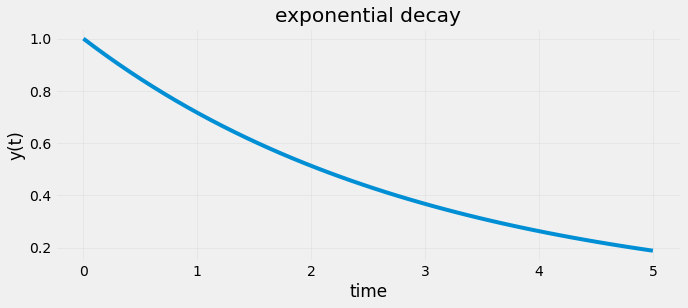

In [57]:
# define parameter T
T = 3
# create array of time (t) values to use in equation for y(t)
time_array = np.linspace(0,5)
# initialize variable y (y(t) in above example) as y_0
y_0 = 1
# create exponential decay function
y = y_0*np.exp(-time_array/T)

# define figure size of plot for visualization preferences
plt.figure(figsize=(10,4))
# plot y versus t
plt.plot(time_array, y)
# change the grid opacity from default to make it more transparent
plt.grid(alpha=0.25)
# Label x axis
plt.xlabel("time")
# label y axis
plt.ylabel("y(t)")
# create a title for the plot
plt.title("exponential decay")


Now, the question is: can we get `solve_ivp` to give us the same result? We will follow these steps:
1. put our equation(s) in the standard form
2. define the function `solve_ivp` needs to use
3. define the time range 
4. define the initial condition(s)
5. set up parameters for the model
6. call `solve_ivp`
7. unpack the results and make a plot

Note that this problem is simple enough that step 1 is automatically done:
$$\frac{dy(t)}{dt} = -\frac{1}{T}y(t).$$

##### &#9989;&nbsp; [6 Points] Change all of the comments in the following code my replacing each "X" with the correct step from above and explain _why_ this step is needed (use as many lines for the comments as you need). You do not need to change the code itself. 

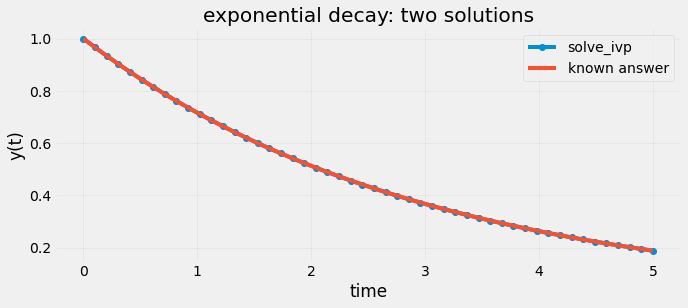

In [58]:
# step 2
# this step is needed to.....
# define the derivatives function that we'll use inside solve_ivp
# returns the derivative for the model using the input value
def derivatives_exp_decay(time_in, current_value, L): return -current_value/L

# step 3
# this step is needed to.....
# define the time range
#
time_range = [0,5]

# step 4
# this step is needed to.....
# define initial conditions
#
initial_conditions = [y_0]

# step 5
# this step is needed to.....
# set up model parameters
#
my_parameter = [T]

# step 6
# this step is needed to.....
# call solve_ivp
#
my_solution = solve_ivp(derivatives_exp_decay,  # store the derivative function/current values
                        time_range,             # when to start and stop running solve_ivp
                        initial_conditions,     # where we feed in y_0/initial condition
                        args=(my_parameter))    # parameter T; have to do bc we have more conditions to 
                                                # feed it than the 2 that are in the derivative function

my_solution = solve_ivp(derivatives_exp_decay, time_range, initial_conditions, t_eval = time_array, args=(my_parameter))

# step 7
# this step is needed to.....
# unpack and plot the results
plt.figure(figsize=(10,4))
plt.plot(my_solution.t, my_solution.y[0], 'o-', label = 'solve_ivp')
plt.plot(time_array, y, label = 'known answer')
plt.grid(alpha=0.25)
plt.xlabel("time")
plt.ylabel("y(t)")
plt.title("exponential decay: two solutions")
plt.legend()


##### &#9989;&nbsp; [7 Points] Comment on your findings. 
1. Are you convinced you know how to use `solve_ivp`? Does the known solution looks exactly like the one `solve_ivp` generated?
2. Add to the argument list of `solve_ivp` the option `t_eval = time_array`: what does that do? 
3. Does `t_eval = time_array` help interpret the results? 
4. Describe how this strategy could also be used for other Python libraries, such as `curve_fit`. Give (in words) an example.
5. What are the two most confusing things about using `solve_ivp`? 
6.  What tip would you give to incoming CMSE 201 students next semester on how to best learn `solve_ivp` most easily?


<font size=+3>&#9998;</font> *Put your answers here.*

1. I think so. No, it does not look exactly the same. it is using less data points over which to compute the decay function so the plot is 4 connected pieces of straight lines.


2. It tells solve_ivp to evaluate the function over all of the t (x) values in time_array, whic is 50 values because that is the default for np.linspace.


3. Yes. The solve_ivp solution now more closely matches the known solution because it updates the differential equation at more values of t


4. I dont know what this is asking


5. The derivatives function is probably the most confusing part, making sure that its set up properly based on the model. So i guess making sure you understand ODE's and can apply that to the derivatives equation is also confusing.


6. Go to office hours if you can.



____
____

## Part 2: Modeling a COVID Pandemic
____

### Part 2a: Setting Up The Model
____
Great work so far! Let's ramp this up a bit. 

We are currently about a year into a global pandemic. You are probably getting exhausted by this, and it is making learning much less enjoyable than it would be otherwise. Worse, it appears that spring is around the corner: we will all have a little - or a lot - of spring fever and post-pandemic fever in the next few weeks, especially as we get our vaccines. Places like Miami Beach were so over crowded they declared a state of emergency. 

Let's see if we can use `solve_ivp` to shed a little light on what might happen during a pandemic when large numbers of people stop staying home and wearing masks. Such questions are difficult to answer without such models, because we can't run experiments of this kind. 

We will use our basic SIR model, since you are already familiar with that. It has the ODE form
$$\frac{dS(t)}{dt} = -\beta S(t) I(t),$$
$$\frac{dI(t)}{dt} = \beta S(t) I(t) - \gamma I(t),$$
$$\frac{dR(t)}{dt} = \gamma I(t).$$

These are written in the form `solve_ivp` likes: all of the $dX/dt$ quantities on the left, and the equations we need to code up on the right. Unlike the simple example you started with above, we now have three variables $S(t)$, $I(t)$ and $R(t)$, each with its own initial condition $S(0)$, $I(0)$ and $R(0)$. How COVID evolves is determined by the two disease parameters $\beta$ and $\gamma$, which are the infectivity and recovery rate, respectively.

To model spring fever we are going to make these two assumptions:
1. when people start going out more, the infectivity rate $\beta$ increases,
2. the change of behavior is sudden, which allows us to break the pandemic into two time periods. 

Your task is to code this model using `solve_ivp`. Note that this is a little different from what you have done before because you always just got one solution and you were done. Now, the parameters are changing during the course of the solution. What to do? 

You will solve this through these steps:
1. solve the SIR with `solve_ivp` as usual for some time period, (**CELL A** below)
2. when that is done, rather than plotting it and stopping, you use its output *to do a second solution*.
That is, the initial condition of the second solution is the final value of the first solution, with a $\beta$ that has a larger value. (**CELL B** below)

Some of the code is provided here to get you started. **You need to fill in the parts with [....]**. (But, also feel free to modify the code as much as you wish!) 

##### &#9989;&nbsp; [5 points] Complete this code and comment it.

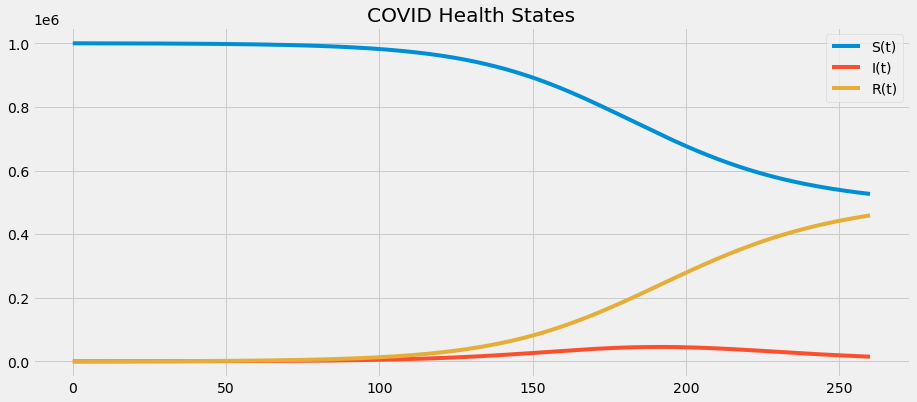

In [59]:
###############
# CELL A
###############
# SIR function 
def sir(t, y, beta, gamma):
    # unpack incoming solution into its pieces; give meaningful names
    S = y[0] # susceptible
    I = y[1] # infected
    R = y[2]
    # return the current derivatives back to solve_ivp
    return -beta*S*I, beta*S*I - gamma*I, gamma*I


# set up what solve_ivp is going to need
first_initial_conditions = [1e6, 100, 0] # this is for a region with about a million people
end_first = 260 # number of days to run before spring break (you will be varying this)
first_time_span = [0, end_first] 
beta = 1.4e-7
gamma = 1/10 # people recover in about 10 days
time_array_plotting = np.linspace(0, end_first, 300) # get more points


first_solution = solve_ivp(sir,                          # function to use with derivatives
                           first_time_span,              # time period over which we want a solution
                           first_initial_conditions,     # where we want the variables to start
                           t_eval = time_array_plotting, # get a lot of points so that the plots look good
                           args=(beta,gamma))            # pass parameters the model needs beyond the variables


plt.figure(figsize=(14,6))
plt.plot(time_array_plotting, first_solution.y[0], label='S(t)')
plt.plot(time_array_plotting, first_solution.y[1], label='I(t)')
plt.plot(time_array_plotting, first_solution.y[2], label='R(t)')
plt.title("COVID Health States")
plt.legend()
plt.show()

The next part can be tricky. Here are the steps you need to carry out:
* most of the code is written already, above, including the function that has the derivatives; so, there is very litte new code to write,
* you want to start the next phase of the pandemic with new initial conditions, _which are the final conditions_ of the previous run (how can you access the final values from the solution array `solve_ivp` gave you?),
* you need to change the infectivity $\beta$ to three times its value to reflect that people are out and about,
* you will want to plot both solutions on the same plot, so you need to be careful that you choose the names of your variables carefully,
* note that the second phase does not start at day zero - it starts at the end date of the previous solution.

##### &#9989;&nbsp; [5 points] Complete these instructions by completing the code in the next cell. Fix the [....] and comment the code. 

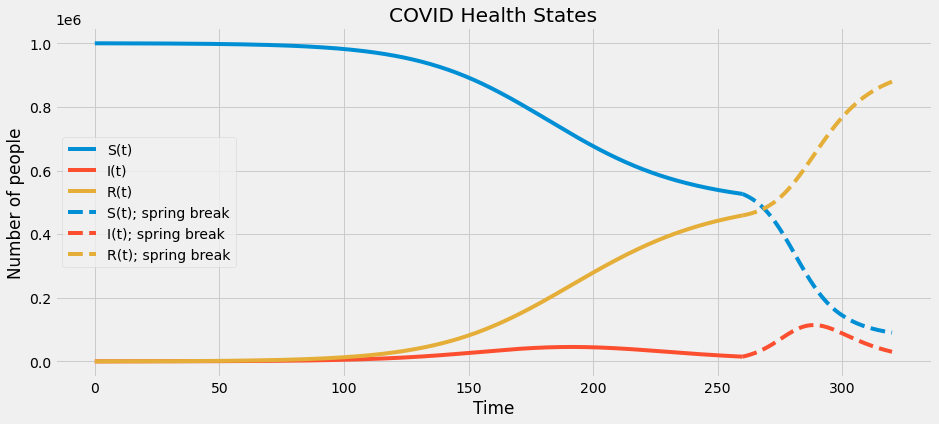

In [60]:
###############
# CELL B
###############

# Uses the final values of the unpacked results as the initial conditions 
second_initial_conditions = [first_solution.y[0][-1], first_solution.y[1][-1], first_solution.y[2][-1]]
# Makes the infection rate increase 3x to show change in behavior in 2nd phase
second_beta = beta*3
# has the time of the second phase last 60 t after the end of the first phase
end_second = end_first + 60
second_time_span = [end_first, end_second]

time_array_plotting_2 = np.linspace(end_first, end_second, 300) # get more time points


second_solution = solve_ivp(sir,                           # function to compute the derivative functions
                           second_time_span,               # time period where want to begin and end the 2nd phase
                           second_initial_conditions,      # where we want the variables to start
                           t_eval = time_array_plotting_2, # get a lot of points (300 points)
                           args=(second_beta,gamma))       # pass parameters beta (infection rt), gamma(recovery rt)


plt.figure(figsize=(14,6))
# before spring break
plt.plot(time_array_plotting, first_solution.y[0], label='S(t)')
plt.plot(time_array_plotting, first_solution.y[1], label='I(t)')
plt.plot(time_array_plotting, first_solution.y[2], label='R(t)')
# after spring break
plt.gca().set_prop_cycle(None) # this makes sure the color order stays the same
plt.plot(time_array_plotting_2, second_solution.y[0], '--', label='S(t); spring break')
plt.plot(time_array_plotting_2, second_solution.y[1], '--', label='I(t); spring break')
plt.plot(time_array_plotting_2, second_solution.y[2], '--', label='R(t); spring break')
plt.xlabel('Time')
plt.ylabel('Number of people')
plt.title("COVID Health States")
plt.legend()
plt.show()

____
### Part 2b: Modeling
____

Now that your code is working, let's turn to modeling. 

##### &#9989;&nbsp; [1 Point Each] Use your code to answer these questions:

#### Question 1

Did you see a second wave form during the second (spring break) time period? Describe the characteristics of the spring break time period. 

#### Question 2

Notice when spring break starts - after the first peak. What if the pandemic had been shifted and spring break started earlier? Re-run the model such that spring break starts before the first peak. How did that change the course of the pandemic?

#### Question 3

How important is the initial number of infected? For at least one of the scenarios you have already explored, vary $I(0)$ to examine the impact of the number of initially-infected spring-breakers. How does $I(0)$ impact the course of the pandemic? 

#### Question 4

What is the impact of having spring break later, when the pandemic has died down? That is, is there a best and worst time for spring break? For example, what if we had spring break at the peak of the pandemic versus toward the end? 

#### Question 5

Here, we use an increase of $\beta$ to model people going to beaches for spring break. This also models something else that is getting increasingly worrisome: _the rise of COVID mutations_. These mutations may not be as treatable with current vaccines. Let us suppose that mutations slowly arise according to 
$$\beta(t) = \beta + \delta t;$$ 
that is, there is a linear increase in the infectivity $\beta$ over time as mutants arise. (Here, $\delta$ is a constant increase/slope of the time-varying $\beta(t)$). Describe in words how you would code this. That is, what changes to the code above would be needed to account for the fact that a parameter is not constant? Can `solve_ivp` handle this case? Describe in words and pseudocode how you might be able to make this happen. (Hint: how you could use the _first_ argument (time $t$) to the derivative function `solve_ivp` calls.) 


<font size=+3>&#9998;</font>
1. Yes. There is a very large increase in I immediately at the beginning of the second phase & within a very short timespan. With that, the spring break period is also the period where the 'infected' group is at its largest. There is a sharp decline in the susceptible population as many of them become infected and eventually recovered, modeled by a similarly sharp increase in R.

2. The increase in I is larger and more steep, the susceptible population ('S') drops much lower much sooner, while R is much closer to 1 much earlier.

3. When I(0) is larger, the peak of the I is much sooner/ a larger proportion of the population changes from susceptible to infected to recovered sooner

4. The earlier that spring break happens in the pandemic, the greater the magnitude of the spike in I (proportion of the population that is infected at that time) that spring break causes, and the shorter amount of time I changes from relatively low to its peak level. In reality this causes the overcrowding/overwhelming of hospitals we've seen, as such a large percentage of the population becomes infected in only a couple of days time. When spring break is later on in the pandemic, I still sees a large increase (spike), but it is more gradual than as mentioned above, and less of the population becomes part of the 'infected' category at that time (magnitude of I is smaller). In reality, this is easier for healthcare workers and medical infrastructure to handle. 

5. It wouldnt be used as a parameter and an input to the derivatives function. You would have to do the same thing inside the derivatives function as you do for S, I, and R, which is to include it in the derivatives function so that the function returns the derivative equation for beta(t).

____
____

## Part 3: Agent-Based Modeling
____

The SIR models we have been using so far in this class are very powerful. However, they are not perfect and some of the assumptions they make are not always valid. For example, in the examples above, people tend to go to certain beaches for spring break and not to the middle of Nebraska. Similarly, as you may have gathered from the news, new mutations of COVID arise in certain geographical areas and slowly spread around the world. This spatial dependence is incredibly important and totally missing from all of the SIR models we have considered so far. 

An elegant solution is to simply combine the SIR idea with a notation of space, allowing the disease to spread from one location to another. Agent-based models are the ideal approach for doing this; here, we will write an ABM to model the spread of COVID across a continent, from the beaches back to the rest of the population. 

We will keep it fairly simple. If you want to add more to this, consider a project on ABMs! 

Luckily, we have been learning about 2D NumPy arrays, which are a natural container for 2D spatial information (like the surface of the Earth). 

___
Let's start with some practice with Numpy! The ABM code won't make a lot of sense if we are not expert at 2D Numpy arrays.

Comment a code that creates a 2D NumPy array that is filled with zeros with some shape _(x,y)_ and visualize its contents with `imshow`. 

##### &#9989;&nbsp; [2 Points] Add comments to every line of this code.

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]] 

[[-1.0019598  -0.55336474  0.36205867  1.56094059]
 [-1.75898512 -1.35551022 -0.15140089 -0.28778239]
 [ 1.82222175  0.55367983 -1.44768762 -2.0885576 ]
 [-0.79564469  0.94848111  0.08859238 -1.32415995]
 [-0.5254674   0.08073578  0.00989112  0.55768988]
 [-1.03968301  0.08798523  0.57483188  0.33301658]] 

-0.15140088743750285 0.5536798321340769 



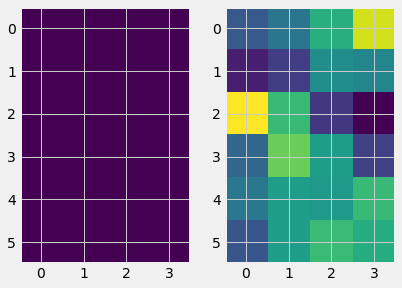

In [61]:
# create 2d numpy array, with all values = 0. "\n" creates a new line/puts a line ofwhitespace after it/between it 
    # & the next print statement 
array_zeros = np.zeros((6,4))
print(array_zeros, "\n")
# create another 2d array; draws random values from a standard normal dist, w 6 arrays w 4 elements/array within 2d array
array_random = np.random.standard_normal(size=(6,4))
# print the whole 2d array; print 3rd element in 2nd 1d array; print 2nd element in 3rd 1d array
print(array_random, "\n")
print(array_random[1,2], array_random[2,1], "\n")
# set figure size to horizontal width 6, vertical height 6
plt.figure(figsize=(6,6))
# create a plot with 2 subplots: 1 row, 2 columns (both subplots in 1 row)
# first subplot: plot of the array of zeros, displayed as an image
plt.subplot(121)
plt.imshow(array_zeros)
# second subplot: plot of the random values array, with values mapped to colors as an image
plt.subplot(122)
plt.imshow(array_random)
plt.show()

##### &#9989;&nbsp; [3 Points] Look at the output of the previous code. Describe in your own words the shape of a 2D NumPy array. For example, note that a 2D NumPy array looks like a list of lists. If we specify a 2D array with dimensions $2\times 3$, what is the length of the overall list and what is the length of the lists inside the overall list? If we ask for `x[2,3]` or `x[3,2]`, which values do we retrieve? That is, what does the first number refer to and what does the second number refer to?

<font size=+3>&#9998;</font> It is an array with arrays inside of it, all with the same # of elements. The positions/indexes of the elements are like the columns, and each 1d array inside the 2d array is like the row.  1st # refers to the array, second # refers to the element in that array. 

____
#### Ok, let's explore an ABM with 2D NumPy arrays!

Most of the code is given; all you need to do is: *understand it, fix it and use it.*

##### &#9989;&nbsp; [5 Points] Comment every line of the code below and replace the [...] with actual code.



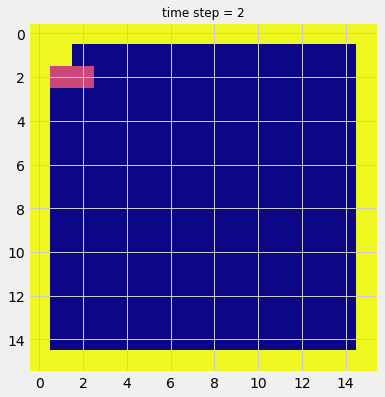

In [ ]:
# needed for animation to work properly - can make & clear plots without remaking them; 
        # use time to specify how images show up
from IPython.display import display, clear_output
import time
# function that creates the board
def abm_init(shape):
    
    '''
    The convention for this ABM is:
    0 = S (susceptible)
    1 = I (infectious)
    2 = R (recovered)
    '''
    
    world = np.zeros(shape, dtype = int) # init board of all (integer) 0's w shape = function input
    world[:,0] = 2  #
    world[:,world.shape[1]-1] = 2
    world[0,:] = 2
    world[world.shape[0]-1,:] = 2
    
    world[1,1] = 1
    
    return world # returns initial board


def abm_update(old_state):
    
    current_state = np.copy(old_state)
    
    prob_recover = 0.1
    prob_infection = 0.7
    
    num_rows = current_state.shape[0]
    num_columns = current_state.shape[1]
    
    row_start = 1
    row_end = num_rows 
    col_start = 1
    col_end = num_columns
    
    for row in range(row_start, row_end):
        for col in range(col_start, col_end):
            
            if old_state[row, col] == 1 and np.random.random() < prob_recover:
                current_state[row, col] = 2
            elif old_state[row, col] == 0:
                num_inf_neighbors = (old_state[row-1:row+2,col-1:col+2] == 1).sum() # explain this in detail
                for _ in range(num_inf_neighbors):
                    if np.random.random() < prob_infection:
                        current_state[row, col] = 1
                    
    return current_state


rows = 16 # vertical height
columns = 16 # horizontal width
abm_world = abm_init((rows,columns))

t = []
S = []
I = []
R = []

# you may need to adjust this for your notebook layout
fig = plt.figure(figsize=(6,6))

for index in range(25):
    
    t.append(index+1)
    
    # comment this out if you are using the animation code below
    #plt.subplot(5,5,index+1)
    
    plt.imshow(abm_world, vmin=0, vmax=2, cmap = 'plasma') # why are vmin and vmax needed?
    plt.title("time step = {}".format(index+1), fontsize = 12)
    abm_world = abm_update(abm_world)

    # If you want an animation: (1) comment out the subplot command, (2) make
    # the figsize smaller, and (3) uncomment these lines.
    time.sleep(0.05) 
    clear_output(wait=True)
    display(fig)
    fig.clear()
    
    current_S = (abm_world == 0).sum(); S.append(current_S)
    current_I = (abm_world == 1).sum(); I.append(current_I)
    current_R = (abm_world == 2).sum(); R.append(current_R)
    
plt.tight_layout()


Next, we are going to think about the modeling aspect of this. 

##### &#9989;&nbsp; [1 Points Each] Answer these questions using the code that was given to you.

#### Question 6

Describe in your own words the logic behind this ABM model. What is being shown in the figure? Why do you think there is an initial border of recovered around the edges? What is the initial condition and how could you change it.

#### Question 7

ABMs use random numbers; this is an example of what is called a "stochastic model". Run the ABM many ($>10$) times. Describe in your own worlds the variations you see in the output. What are the extremes you see? For example, do you ever see nothing happen? Nearly nothing? Do you see all cells get infected? Run the code below this cell to see the totals versus time; notice the variations from run to run. Change the number of cells in the ABM to see how that impacts the noise - comment on that.

#### Question 8

Change the values of the probabilities (recovery and infection), and answer the same question. How does the movement of the disease across the continent change as these probabilities change values? For example, if there is a spring break event or there are new mutations, how does that impact the flow of the disease across the continent? 

#### Question 9

Think of a problem that interests you, and describe it. Modify the code to answer your question and also describe what answer you found.


<font size=+3>&#9998;</font> *Put your answers here.*

______
The following code is used for question 7.

In [ ]:
plt.plot(t, S, label = 'S')
plt.plot(t, I, label = 'I')
plt.plot(t, R-R[0], label = 'R')
plt.title("COVID Disease States")
plt.legend()
plt.xlabel('Time')
plt.ylabel('Number of people')

---
## Assignment Wrap-up

Please fill out the following Google Form before you submit your assignment. **You must completely fill this out in order to receive credit for the assignment!**

**COMPLETE THIS SURVEY through [this link](https://forms.office.com/Pages/ResponsePage.aspx?id=MHEXIi9k2UGSEXQjetVofRzD77LVqLNIpscq-NmZsrdUNk5SWDJST1E2T1AzWlI5RzNVTFhBRkI4WC4u) or through cell below.**


In [ ]:
from IPython.display import HTML
HTML(
"""
<iframe 
	src="https://forms.office.com/Pages/ResponsePage.aspx?id=MHEXIi9k2UGSEXQjetVofRzD77LVqLNIpscq-NmZsrdUNk5SWDJST1E2T1AzWlI5RzNVTFhBRkI4WC4u" 
	width="80%" 
	height="1200px" 
	frameborder="0" 
	marginheight="0" 
	marginwidth="0">
	Loading...
</iframe>
"""
)

---

### Congratulations, you're done!

Submit this assignment by uploading it to the course Desire2Learn web page.  
Go to the "Homework Assignments" section, find the appropriate submission folder link, and upload it there.


&#169; Copyright 2020, [Department of Computational Mathematics, Science and Engineering](https://cmse.msu.edu) at Michigan State University.